# Titanic
Mit Machine Learning die Überlebenschancen von Passagieren auf der Titanic berechnen. 

In diesem Datenset sind die Passagierdaten von allen Passagieren der Titanic enthalten. Anhand der Daten soll mit Machine Learning ein Modell entwickelt werden mit dem vorhergesagt werden kann welche Passagiere den Untergang überlebt haben und welche nicht.

In [381]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline


Es gibt ein training Datenset mit dem das Modell trainiert wird und eins mit dem das Modell überprüft wird. 

In [382]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
#ergebnis = pd.read_csv("Data/gender_submission.csv") # Das ist nur ein beispiel submission File, nicht das Ziel!

train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [383]:
test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

# Data cleaning
Die Daten sind teilweise unvollständig. Damit das Modell trainiert werden kann müssen die fehlenden Werte ersetzt werden. Da das Alter der Passagiere einen großen einfluss auf die Überlebenschancen der Passagiere hat wird hier der Median für die fehlenden Werte eingesetzt. Bei "Cabin" fehlen zu viele Werte um hier sinnvolle Werte einzufügen und der Abreiseort sollte keinen Einfluss auf die Überlebenschancen haben. Deshalb werden diese Kategorien nicht in das Maschinelle Lernen mit einbezogen.

In [384]:
print train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [385]:
# alle Einträge aus train löschen, die keinen Wert für Age enthalten
#train = train.dropna(subset=["Age"])

#besser: Durchschnittswert einsetzen
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True)

#train.describe()
train.sample(5)

PassengerId  Survived  Pclass  \
445          446         1       1   
376          377         1       3   
146          147         1       3   
500          501         0       3   
78            79         1       2   

                                             Name     Sex    Age  SibSp  \
445                     Dodge, Master. Washington    male   4.00      0   
376               Landergren, Miss. Aurora Adelia  female  22.00      0   
146  Andersson, Mr. August Edvard ("Wennerstrom")    male  27.00      0   
500                              Calic, Mr. Petar    male  17.00      0   
78                  Caldwell, Master. Alden Gates    male   0.83      0   

     Parch  Ticket     Fare Cabin Embarked  
445      2   33638  81.8583   A34        S  
376      0  C 7077   7.2500   NaN        S  
146      0  350043   7.7958   NaN        S  
500      0  315086   8.6625   NaN        S  
78       2  248738  29.0000   NaN        S

In [386]:
print test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Sklearn DecisionTreeClassifier kann nur mit Zahlen arbeiten, deshalb müssen alle Strings, die später benutzt werden, in Zahlen umgewandelt werden.

In [387]:
# alle strings in Zahlen umwandeln?
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "male" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "male" else 1)

# Data Exploration

In [388]:
train.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000    6.000000  512.329200

In [389]:
train.groupby("Survived").mean()

PassengerId    Pclass       Sex        Age     SibSp     Parch  \
Survived                                                                   
0          447.016393  2.531876  0.147541  30.028233  0.553734  0.329690   
1          444.368421  1.950292  0.681287  28.291433  0.473684  0.464912   

               Fare  
Survived             
0         22.117887  
1         48.395408

In [390]:
train.groupby("Sex").mean()

PassengerId  Survived    Pclass        Age     SibSp     Parch       Fare
Sex                                                                           
0     454.147314  0.188908  2.389948  30.140676  0.429809  0.235702  25.523893
1     431.028662  0.742038  2.159236  27.929936  0.694268  0.649682  44.479818

Correlationsmatrix

In [391]:
train.corr().abs()

PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.005007  0.035144  0.042939  0.034212  0.057527   
Survived        0.005007  1.000000  0.338481  0.543351  0.064910  0.035322   
Pclass          0.035144  0.338481  1.000000  0.131900  0.339898  0.083081   
Sex             0.042939  0.543351  0.131900  1.000000  0.081163  0.114631   
Age             0.034212  0.064910  0.339898  0.081163  1.000000  0.233296   
SibSp           0.057527  0.035322  0.083081  0.114631  0.233296  1.000000   
Parch           0.001652  0.081629  0.018443  0.245489  0.172482  0.414838   
Fare            0.012658  0.257307  0.549500  0.182333  0.096688  0.159651   

                Parch      Fare  
PassengerId  0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443  0.549500  
Sex          0.245489  0.182333  
Age          0.172482  0.096688  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.000000

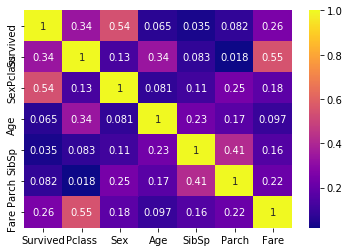

In [392]:
#sns.heatmap(train.corr().abs(), annot = True, cmap = "plasma")
sns.heatmap(train[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].corr().abs(), 
            annot = True, cmap = "plasma")

In der Korrelationsmatrix sieht man eine starke Korrelation zwischen Geschlecht und Überlebenschancen, sowie Pclass und Fare.

Hohe Korrelation zwischen Eltern und Geschwistern an Bord also wahrscheinlich Familien die zusammen gereist sind.


([<matplotlib.axis.XTick at 0x1a1ffbba10>,
 <a list of 2 Text xticklabel objects>)

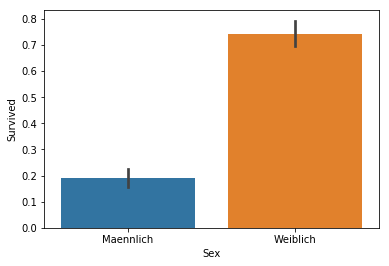

In [393]:
sns.barplot(x="Sex", y="Survived", data = train)
labels = ["Maennlich", "Weiblich"]
plt.xticks(sorted(train.Sex.unique()) ,labels)

Von den Weiblichen Passagieren haben über 70% überlebt, bei den Männlichen nur ca. 20%.

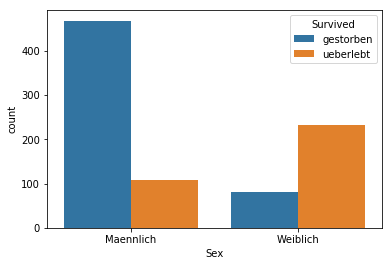

In [394]:
ax = sns.countplot(x="Sex", data = train, hue = "Survived")
plt.xticks(sorted(train.Sex.unique()) ,labels)

leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('gestorben')
legs[1].set_text('ueberlebt')



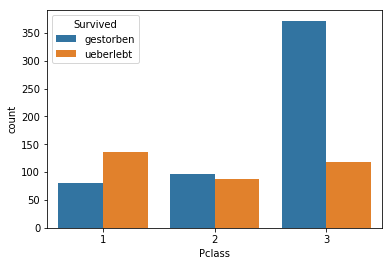

In [395]:
ax = sns.countplot(x = "Pclass", hue = "Survived", data = train)

leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('gestorben')
legs[1].set_text('ueberlebt')

Von den Passagieren der ersten Klasse war der Anteil an Überlebenden am größten. Bei den Passagieren der dritten Klasse, die die größte Gruppe an Bord ausmachten waren die meisten Todesopfer zu verzeichnen weil die dritte Klasse am weitesten von den Rettungsboten entfernt war.

median Alter: 28.0


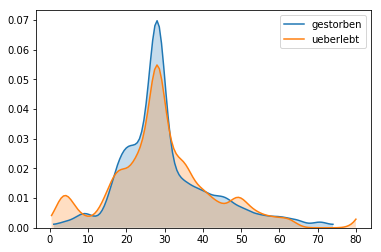

In [396]:
sns.kdeplot(train.loc[(train["Survived"]==0),"Age"], cut=0, label = "gestorben", shade = True, bw=2)
sns.kdeplot(train.loc[(train["Survived"]==1),"Age"], cut=0, label = "ueberlebt", shade = True,
            bw=2
           )
print "median Alter:", train["Age"].median()

Kinder unter 10 Jahre hatten eine deutlich größere Überlebenschance <br>
Am Median befindet sich ein großer Peak, weil der Median für alle fehlenden Werte eingesetzt wurde.

# Dummy Variablen
Weil es sich bei Pclass nicht um kontinuierliche Werte handelt werden Dummy Variablen benötigt mit denen der DecisionTreeClassifier arbeiten kann.

In [397]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [398]:
train = pd.get_dummies(train, columns=["Pclass"])
test = pd.get_dummies(test, columns=["Pclass"])

In [399]:
train.head()

PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    0  22.0      1      0         A/5 21171   7.2500   NaN        S   
1    1  38.0      1      0          PC 17599  71.2833   C85        C   
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3    1  35.0      1      0            113803  53.1000  C123        S   
4    0  35.0      0      0            373450   8.0500   NaN        S   

   Pclass_1  Pclass_2  Pclass_3  
0         0         0         1  
1         1         0         0  
2         0         0         1  
3         1         0         0  
4         0         0         1

# Das erste Modell
Das Vorhersageziel ist "Survived".

In [400]:
y_train = train.Survived
#y_test = test.Survived

In [401]:
print train.columns


Index([u'PassengerId', u'Survived', u'Name', u'Sex', u'Age', u'SibSp',
       u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked', u'Pclass_1',
       u'Pclass_2', u'Pclass_3'],
      dtype='object')


# Features:
Folgende Merkmale werden benutzt um das Machinelearning Modell zu bauen: 
'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'

'Fare' wird nicht verwendet, weil es im Grunde die selben information enthält wie 'Pclass'. 'Embarked', also der Abreiseort der Passagiere hat keinen einfluss auf die Überlebenschancen und wird deshalb nicht verwendet.

In [402]:
train_features=['Pclass_1','Pclass_2', 'Pclass_3', 'Sex', 'Age', 'SibSp', 'Parch']
X_train = train[train_features]
X_test = test[train_features]
X_train.sample(5)

Pclass_1  Pclass_2  Pclass_3  Sex   Age  SibSp  Parch
295         1         0         0    0  28.0      0      0
824         0         0         1    0   2.0      4      1
769         0         0         1    0  32.0      0      0
694         1         0         0    0  60.0      0      0
542         0         0         1    1  11.0      4      2

# Erstes Modell mit DecisionTreeClassifier <br>


In [403]:
model1 = DecisionTreeClassifier(
    max_depth = 6
)
model1.fit(X_train,y_train)

train_prediction = model1.predict(X_train)
print len([row for row in train_prediction - train.Survived if 0 == row]), "richtig zugeordnet"
print len([row for row in train_prediction - train.Survived if 0 != row]), "falsch zugeordnet"
print "accuracy_score:" , accuracy_score(train_prediction, y_train), "Das ist aber nur der in-sample score"

752 richtig zugeordnet
139 falsch zugeordnet
accuracy_score: 0.843995510662 Das ist aber nur der in-sample score


# Visualisierung

DecisionTree kann auf http://webgraphviz.com/ dargestellt werden.

In [404]:
from sklearn.tree.export import export_graphviz
export_graphviz(model1, 
                out_file="depth%d.dot" % model1.max_depth,
                #out_file= "auto.dot",
                feature_names= train_features,
                class_names= "DA",  # D = Dead, A = Alive
                filled = True, rounded = True
               ) 

Der Entscheidungsbaum von dem ersten Modell ist hier dargestellt.

<img src="https://previews.dropbox.com/p/thumb/AAk9ZEPMmGMdatHY_VhO2RO16NxJL-QZGjnQMQOACOaXadE0SM4Wr_SC4dBk66lEUO9CIzN4o7VcoyzT3OEE47d-Nw9GWe4tCSL1ozXayz99xdRWqFiymAj-wDpVFEdgvxkZavCcn4xXYtpqMcMO8MHjANEY6Ozagbk1dq_ao5CKyJvquqqJu1-uWczOW7m-3S_jnZf5jYoNUfPigSz5HZvtjpCl9hb0qKAGEgXJbBZLKJoKL2-n42dBkhSP2qCR9ob0gYJGshDsDY5erC7GUZdx39Qz30C_3BoaTza0SAM74hOb5rF6luG2rE4NIRI7Oqi3ZHdyol7HEDDB0bzoNrcU/p.png?fv_content=true&size_mode=5">

Bei dem DecisionTreeClassifier Algorithmus von scikit-learn wird ein Entscheidungsbaum erzeugt, der anschließend genutzt wird um vorherzusagen, ob die Passagiere aus dem Test-Datenset überlebt haben oder nicht. <br>
Die Passagiere werden anhand von bestimmtien Kriterien in Gruppen aufgeteilt. In der ersten Ebene von diesem Entscheidungsbaum zum Beispiel nach dem Geschlecht. Diese Gruppen werden dann nach weiteren Kriterien, wie dem Alter und der Klasse in der sie gereist sind, aufgeteilt bis am Ende einzelne Blätter übrig sind, die nur noch wenige Passagiere enthalten.

# Validierung
Um zu testen wie gut das Modell ist werden die Daten in 'train' und 'val' aufgeteilt.

In [405]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train)

In [406]:
model_val = DecisionTreeClassifier(
    max_depth = 6
)
model_val.fit(train_X,train_y)
val_predictions = model_val.predict(val_X)

In [407]:
print accuracy_score(val_y, val_predictions)

0.816143497758


Beim maschinellen lernen kann es zum overfitting kommen, wenn der Entscheidungsbaum zu viele Ebenen hat. Dann sind in jedem Blatt nur noch sehr wenige Passagiere enthalten. Der Entscheidungsbaum kann dann zwar perfekte Vorhersagen für die Trainingdaten treffen aber nicht mehr für neue Daten.

In [408]:
def tiefe_DecisionTree(X_tr, y_tr, X_te, y_te, max_tiefe, modell):
    "um herauszufinden welcher wert für max_depth am besten geeignet ist um overfitting zu vermeiden"
    tiefe_list = []
    accuracy_list = []
    for i in range(1, max_tiefe+1):
        model = modell(
            #max_leaf_nodes = i+1,
            max_depth = i,
            random_state = 1)
        model.fit(X_tr, y_tr)
        prediction = model.predict(X_te)
        print i, accuracy_score(y_te, prediction)
        tiefe_list.append(i)
        accuracy_list.append(accuracy_score(y_te, prediction))
    
    
    plt.plot(tiefe_list, accuracy_list,)
    plt.xlabel('Tiefe DecisionTree')
    plt.ylabel('accuracy_score')
    plt.annotate('bester score', xy=(accuracy_list.index(max(accuracy_list))+1, max(accuracy_list)), 
                 xytext=(accuracy_list.index(max(accuracy_list))+3, max(accuracy_list)),
             arrowprops=dict(facecolor='black', 
                             shrink=0.05),)
    plt.grid()
    print 'Der beste Score ist ', max(accuracy_list), 'bei max_depth=', accuracy_list.index(max(accuracy_list)) +1,'.'

1 0.811659192825
2 0.77130044843
3 0.825112107623
4 0.829596412556
5 0.820627802691
6 0.820627802691
7 0.820627802691
8 0.838565022422
9 0.838565022422
10 0.829596412556
Der beste Score ist  0.838565022422 bei max_depth= 8 .


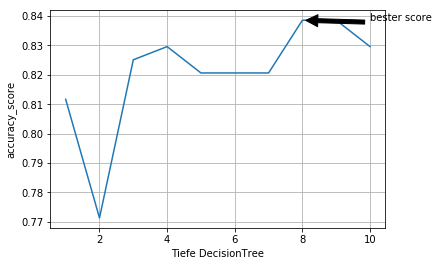

In [409]:
tiefe_DecisionTree(train_X, train_y, val_X, val_y, 10, DecisionTreeClassifier)

# RandomForest 
Um ein besseres Ergebnis zu erhalten wird ein RandomForestClassifier verwendet. Wie der Name schon andeutet wird hier nicht nur ein Entscheidungsbaum verwendet sondern ein ganzes Ensemble.
Die Entscheidungsbäume stimmen dann für jeden Passagier über das Ergebnis ab und die Mehrheit entscheidet. Dadurch werden die Fehler einzelner Entscheidungsbäume ausgeglichen.

In [410]:
model2 = RandomForestClassifier(random_state=1,
                                #max_depth = 7
                               )
model2.fit(train_X,train_y)
prediction = model2.predict(val_X)
accuracy_score(prediction, val_y)

0.80269058295964124

1 0.784753363229
2 0.789237668161
3 0.784753363229
4 0.775784753363
5 0.766816143498
6 0.834080717489
7 0.820627802691
8 0.816143497758
9 0.820627802691
10 0.798206278027
Der beste Score ist  0.834080717489 bei max_depth= 6 .


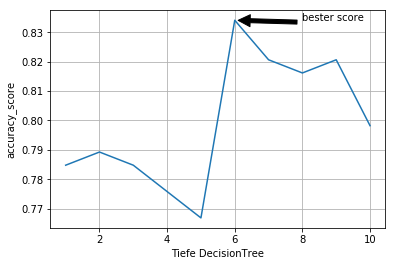

In [411]:
tiefe_DecisionTree(train_X, train_y, val_X, val_y, 10, RandomForestClassifier)

# Bestes Modell anwenden und auf Kaggle hochladen
Um das Modell zu testen wird der RandomForestClassifier auf das Test Datenset angewendet und das Ergebnis auf kaggle.com hochgeladen.

In [412]:
final_model = RandomForestClassifier(max_depth=5)
final_model.fit(X_train, y_train)
final_prediction = final_model.predict(X_test)


In [413]:
submit = test
submit["Survived"] = final_model.predict(X_test)
submit[["PassengerId", "Survived"]].to_csv("Submission.csv", index = False)


Score von Test set auf Kaggle 0.77990, Platz 4667 auf dem Leaderboard.